In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
plt.rcParams['figure.figsize']=(15,15)
plt.rcParams['figure.dpi']=250

In [2]:
data=pd.read_excel('D:\ExcelR\Data science\Assignments\Decision Tree Assignment12\heart_disease.xlsx')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [3]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [4]:
avg=data['oldpeak'].mean()
avg

0.8912529550827426

In [5]:
data['oldpeak'].fillna(avg,inplace=True)

In [6]:
data.count()

age         908
sex         908
cp          908
trestbps    908
chol        908
fbs         908
restecg     908
thalch      908
exang       908
oldpeak     908
slope       908
thal        908
num         908
dtype: int64

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [8]:
data1=pd.get_dummies(data,columns=['sex','cp','restecg','exang','slope','thal'])
data1

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.300000,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1,41,135,203,False,132,0.000000,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,57,140,192,False,148,0.400000,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
3,52,118,186,False,190,0.000000,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
4,57,110,201,False,126,1.500000,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.500000,4,0,1,1,...,1,0,0,0,0,0,1,0,1,0
904,62,166,170,False,120,3.000000,4,0,1,1,...,0,1,0,0,0,1,0,0,0,1
905,56,170,0,False,123,2.500000,4,0,1,0,...,0,1,0,0,1,0,0,0,0,1
906,56,144,208,True,105,0.891253,4,0,1,0,...,0,0,0,1,1,0,0,0,1,0


In [9]:
data1.corr()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,2.327182e-01,0.326493,-0.052194,0.052194,0.144506,...,-0.215375,0.143744,0.083185,1.297975e-01,0.001171,0.073709,-0.079430,-0.028190,-0.115948,0.141007
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,1.521616e-01,0.137251,-0.016441,0.016441,0.019399,...,-0.189106,0.093340,0.132005,1.521007e-01,-0.046933,0.061674,-0.027874,0.025315,-0.064768,0.043336
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,2.874394e-02,-0.238813,0.191513,-0.191513,-0.122055,...,0.037429,-0.040070,-0.002281,5.871692e-03,-0.036498,-0.010115,0.040165,0.030423,0.085007,-0.111797
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,2.275553e-02,0.156268,-0.092167,0.092167,0.077679,...,-0.039372,-0.015066,0.040668,1.074100e-01,0.007318,0.025723,-0.033284,0.032831,-0.071299,0.043423
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-1.287279e-01,-0.323058,0.178794,-0.178794,-0.306755,...,0.358473,-0.285956,-0.040262,-1.724286e-01,-0.059382,-0.219650,0.281715,-0.085608,0.162713,-0.089877
oldpeak,0.232718,0.152162,0.028744,0.022756,-0.128728,1.000000e+00,0.416580,-0.101209,0.101209,0.266930,...,-0.369415,0.376352,0.008084,3.424542e-17,0.034134,0.203760,-0.244462,-0.030855,-0.130643,0.158096
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,4.165798e-01,1.000000,-0.259605,0.259605,0.418896,...,-0.372352,0.344856,0.052690,5.271376e-02,0.027031,0.163703,-0.196087,0.002724,-0.209237,0.208214
sex_Female,-0.052194,-0.016441,0.191513,-0.092167,0.178794,-1.012091e-01,-0.259605,1.000000,-1.000000,-0.188012,...,0.202391,-0.154214,-0.056288,-9.064683e-02,-0.027581,-0.020527,0.044070,-0.097653,0.217821,-0.134942
sex_Male,0.052194,0.016441,-0.191513,0.092167,-0.178794,1.012091e-01,0.259605,-1.000000,1.000000,0.188012,...,-0.202391,0.154214,0.056288,9.064683e-02,0.027581,0.020527,-0.044070,0.097653,-0.217821,0.134942
cp_asymptomatic,0.144506,0.019399,-0.122055,0.077679,-0.306755,2.669302e-01,0.418896,-0.188012,0.188012,1.000000,...,-0.394275,0.422471,-0.051886,-7.090245e-03,-0.020991,0.172711,-0.167003,-0.017436,-0.138645,0.154569


<AxesSubplot:>

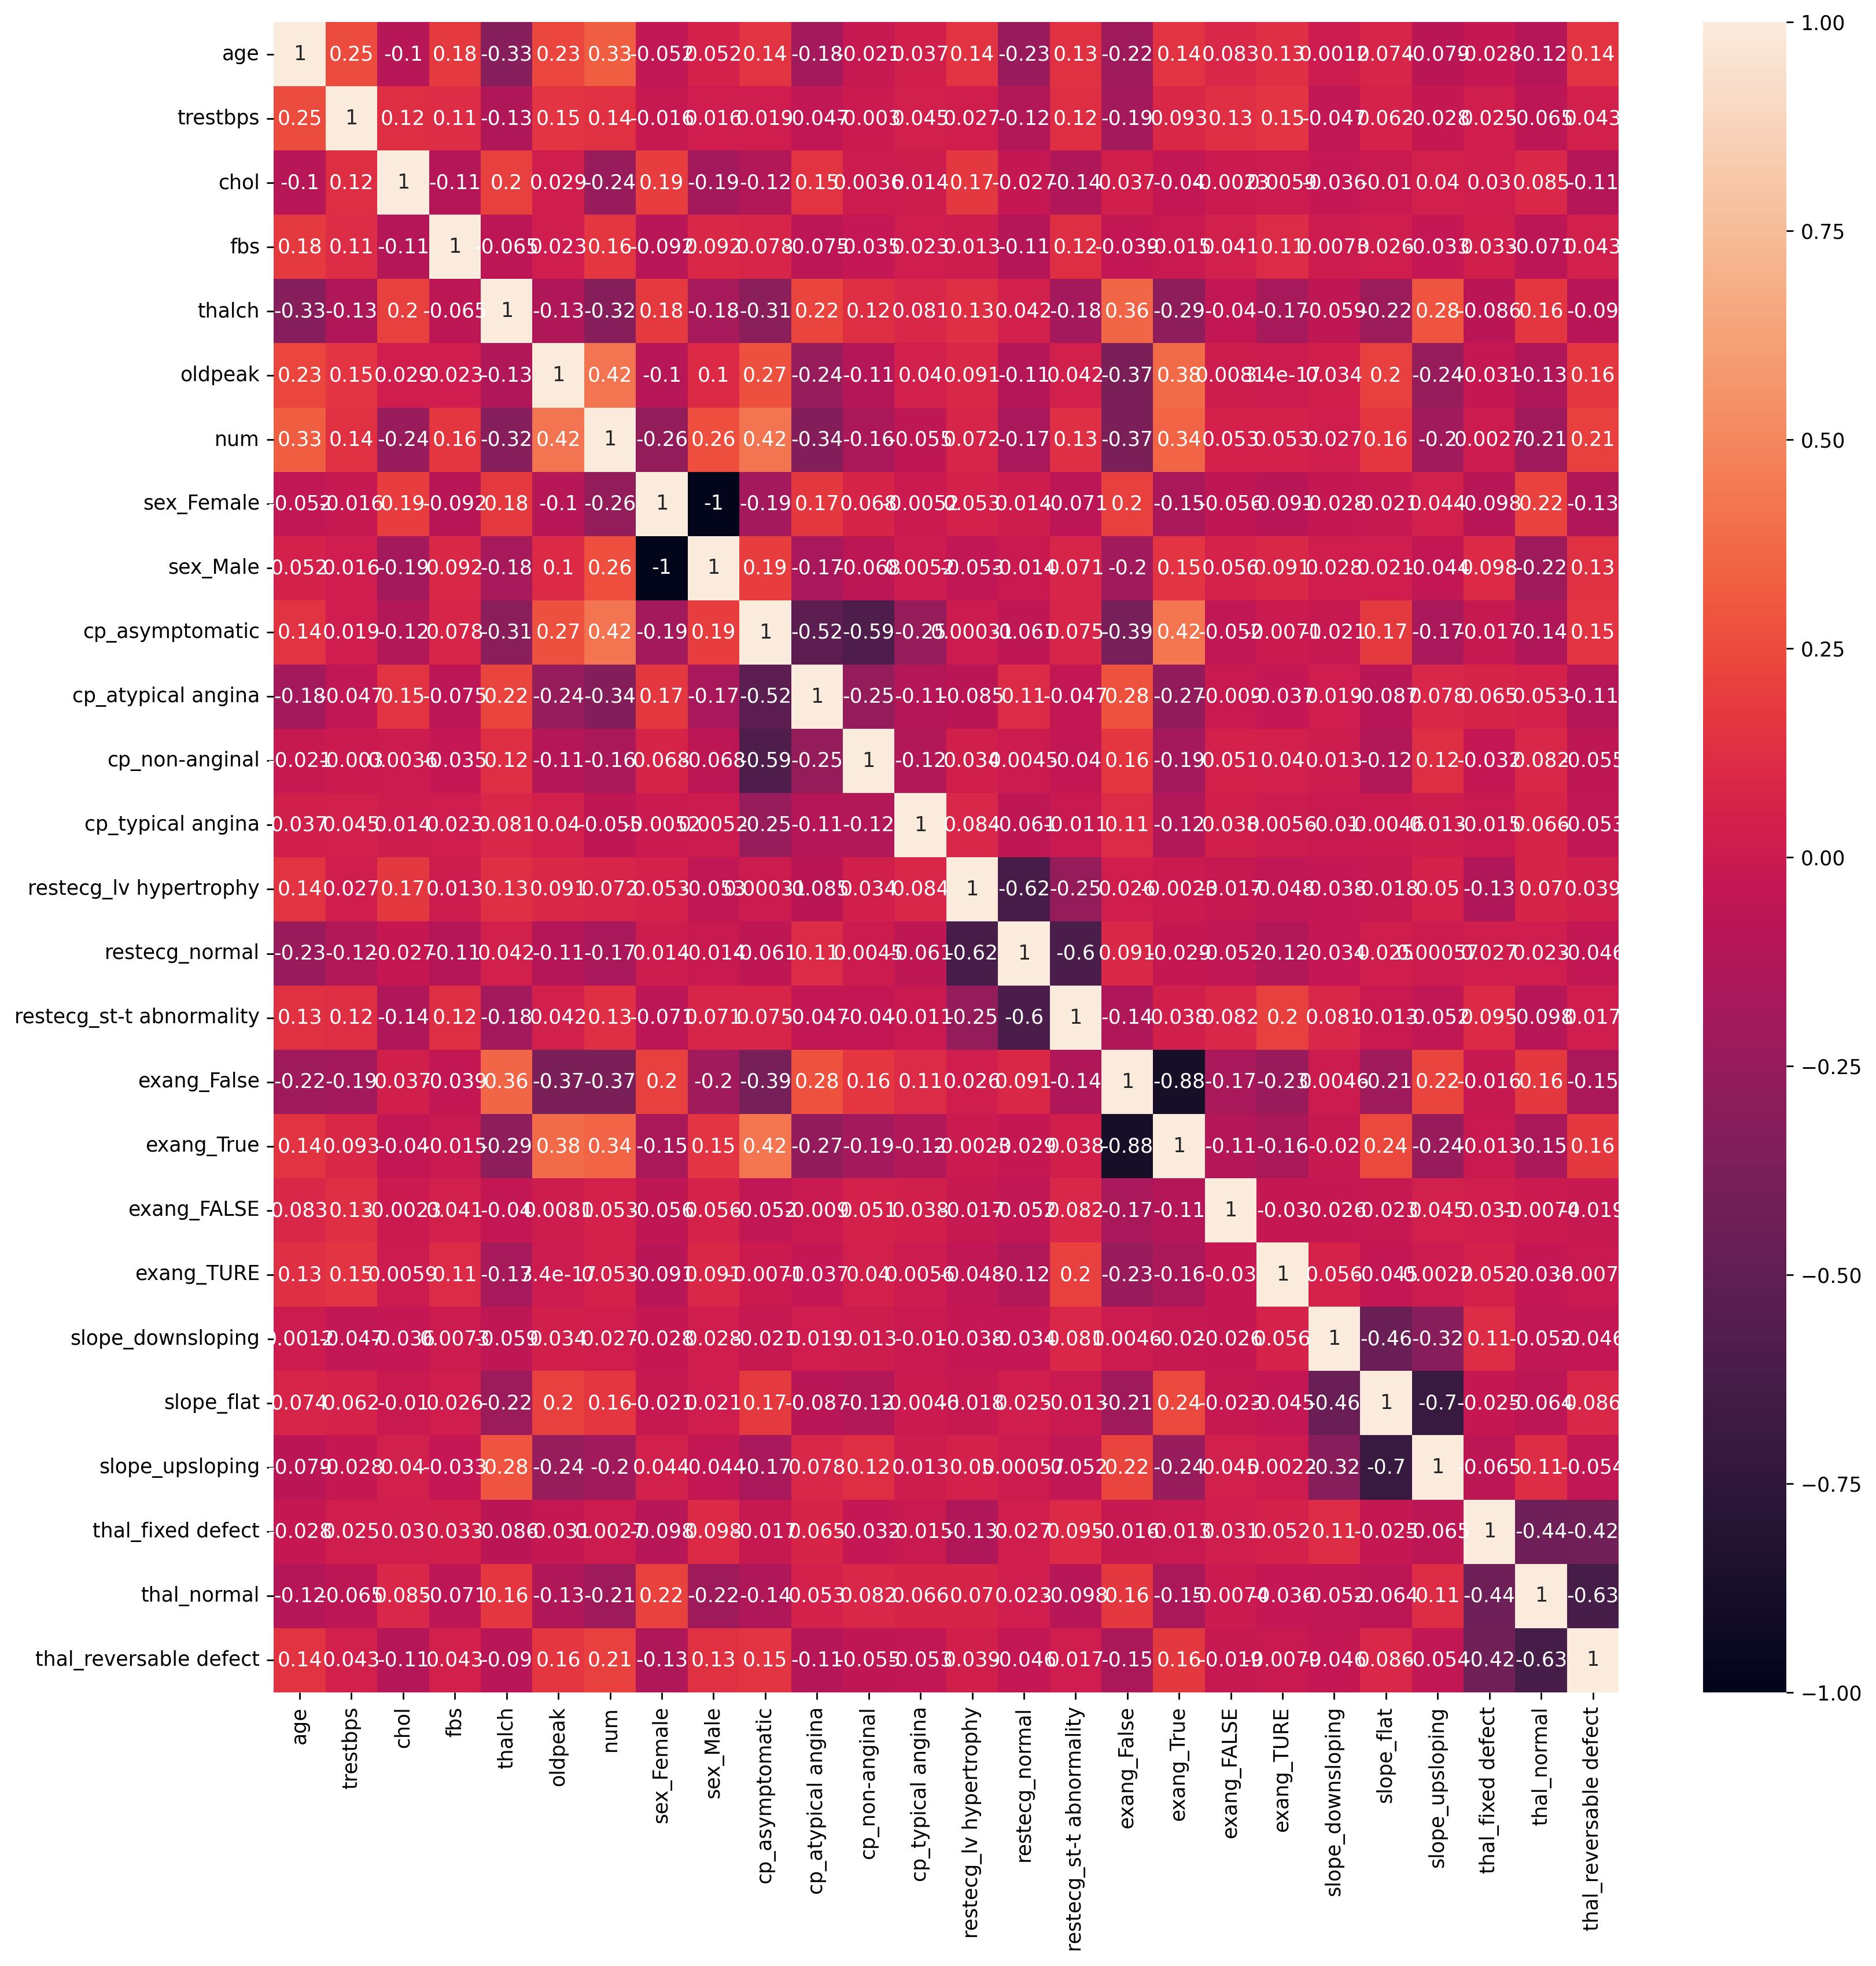

In [10]:
sns.heatmap(data1.corr(),annot=True)

In [11]:
x=data1.iloc[:,:-1]
y=data1['num']

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=45)

In [13]:
xtrain.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,restecg_st-t abnormality,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal
778,59,110,0,False,94,0.000000,3,0,1,1,...,0,1,0,0,0,1,0,0,1,0
772,64,146,244,True,97,0.891253,2,0,1,1,...,1,0,0,0,1,0,0,1,1,0
702,63,130,254,False,147,1.400000,2,0,1,1,...,0,1,0,0,0,0,1,0,0,0
224,54,120,221,False,138,1.000000,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
766,69,184,236,True,131,0.891253,2,0,1,1,...,0,0,0,0,1,0,1,0,0,1


In [14]:
ytrain

778    3
772    2
702    2
224    0
766    2
      ..
607    1
544    1
892    4
643    1
414    1
Name: num, Length: 726, dtype: int64

In [15]:
xtest.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,restecg_st-t abnormality,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal
417,57,130,236,False,174,0.0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,1
630,54,125,216,False,140,0.0,1,0,1,1,...,0,1,0,0,0,0,0,1,0,0
537,52,160,246,False,82,4.0,1,0,1,1,...,1,0,1,0,0,0,1,0,0,1
557,65,130,275,False,115,1.0,1,0,1,1,...,1,0,1,0,0,0,1,0,1,0
471,47,160,0,False,124,0.0,1,0,1,1,...,0,0,1,0,0,0,1,0,0,0


In [16]:
ytest

417    1
630    1
537    1
557    1
471    1
      ..
583    1
546    1
714    2
660    1
637    1
Name: num, Length: 182, dtype: int64

In [17]:
dt=DecisionTreeClassifier(criterion='entropy')

dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 2, 1, 3, 2, 0, 0, 0, 0, 1, 1, 0, 3, 1, 2, 0, 0, 1,
       0, 1, 3, 0, 1, 3, 0, 2, 3, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 3, 1,
       1, 0, 0, 0, 0, 3, 1, 1, 0, 0, 3, 0, 1, 0, 1, 3, 1, 0, 0, 3, 0, 2,
       3, 1, 1, 1, 0, 1, 1, 1, 3, 0, 0, 0, 2, 3, 1, 3, 0, 0, 0, 2, 1, 3,
       3, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 3, 3, 3, 3, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 3, 2, 1, 1, 3, 0, 1, 0, 0, 0, 0, 2, 0, 3, 0,
       2, 0, 0, 0, 2, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 1, 3, 0, 1,
       1, 1, 1, 2, 1, 1], dtype=int64)

In [18]:
x.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num',
       'sex_Female', 'sex_Male', 'cp_asymptomatic', 'cp_atypical angina',
       'cp_non-anginal', 'cp_typical angina', 'restecg_lv hypertrophy',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_False',
       'exang_True', 'exang_FALSE', 'exang_TURE', 'slope_downsloping',
       'slope_flat', 'slope_upsloping', 'thal_fixed defect', 'thal_normal'],
      dtype='object')

In [19]:
dt.feature_importances_

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

## Model Evaluation

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00         2

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



In [22]:
confusion_matrix(ytest,ypred)

array([[85,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0],
       [ 0,  0, 23,  0,  0],
       [ 0,  0,  0, 25,  0],
       [ 0,  0,  0,  0,  2]], dtype=int64)

In [23]:
print('Training accuracy',dt.score(xtrain,ytrain))
print('Testing accuracy',dt.score(xtest,ytest))

Training accuracy 1.0
Testing accuracy 1.0


In [24]:
data1['num'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [25]:
x.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num',
       'sex_Female', 'sex_Male', 'cp_asymptomatic', 'cp_atypical angina',
       'cp_non-anginal', 'cp_typical angina', 'restecg_lv hypertrophy',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_False',
       'exang_True', 'exang_FALSE', 'exang_TURE', 'slope_downsloping',
       'slope_flat', 'slope_upsloping', 'thal_fixed defect', 'thal_normal'],
      dtype='object')

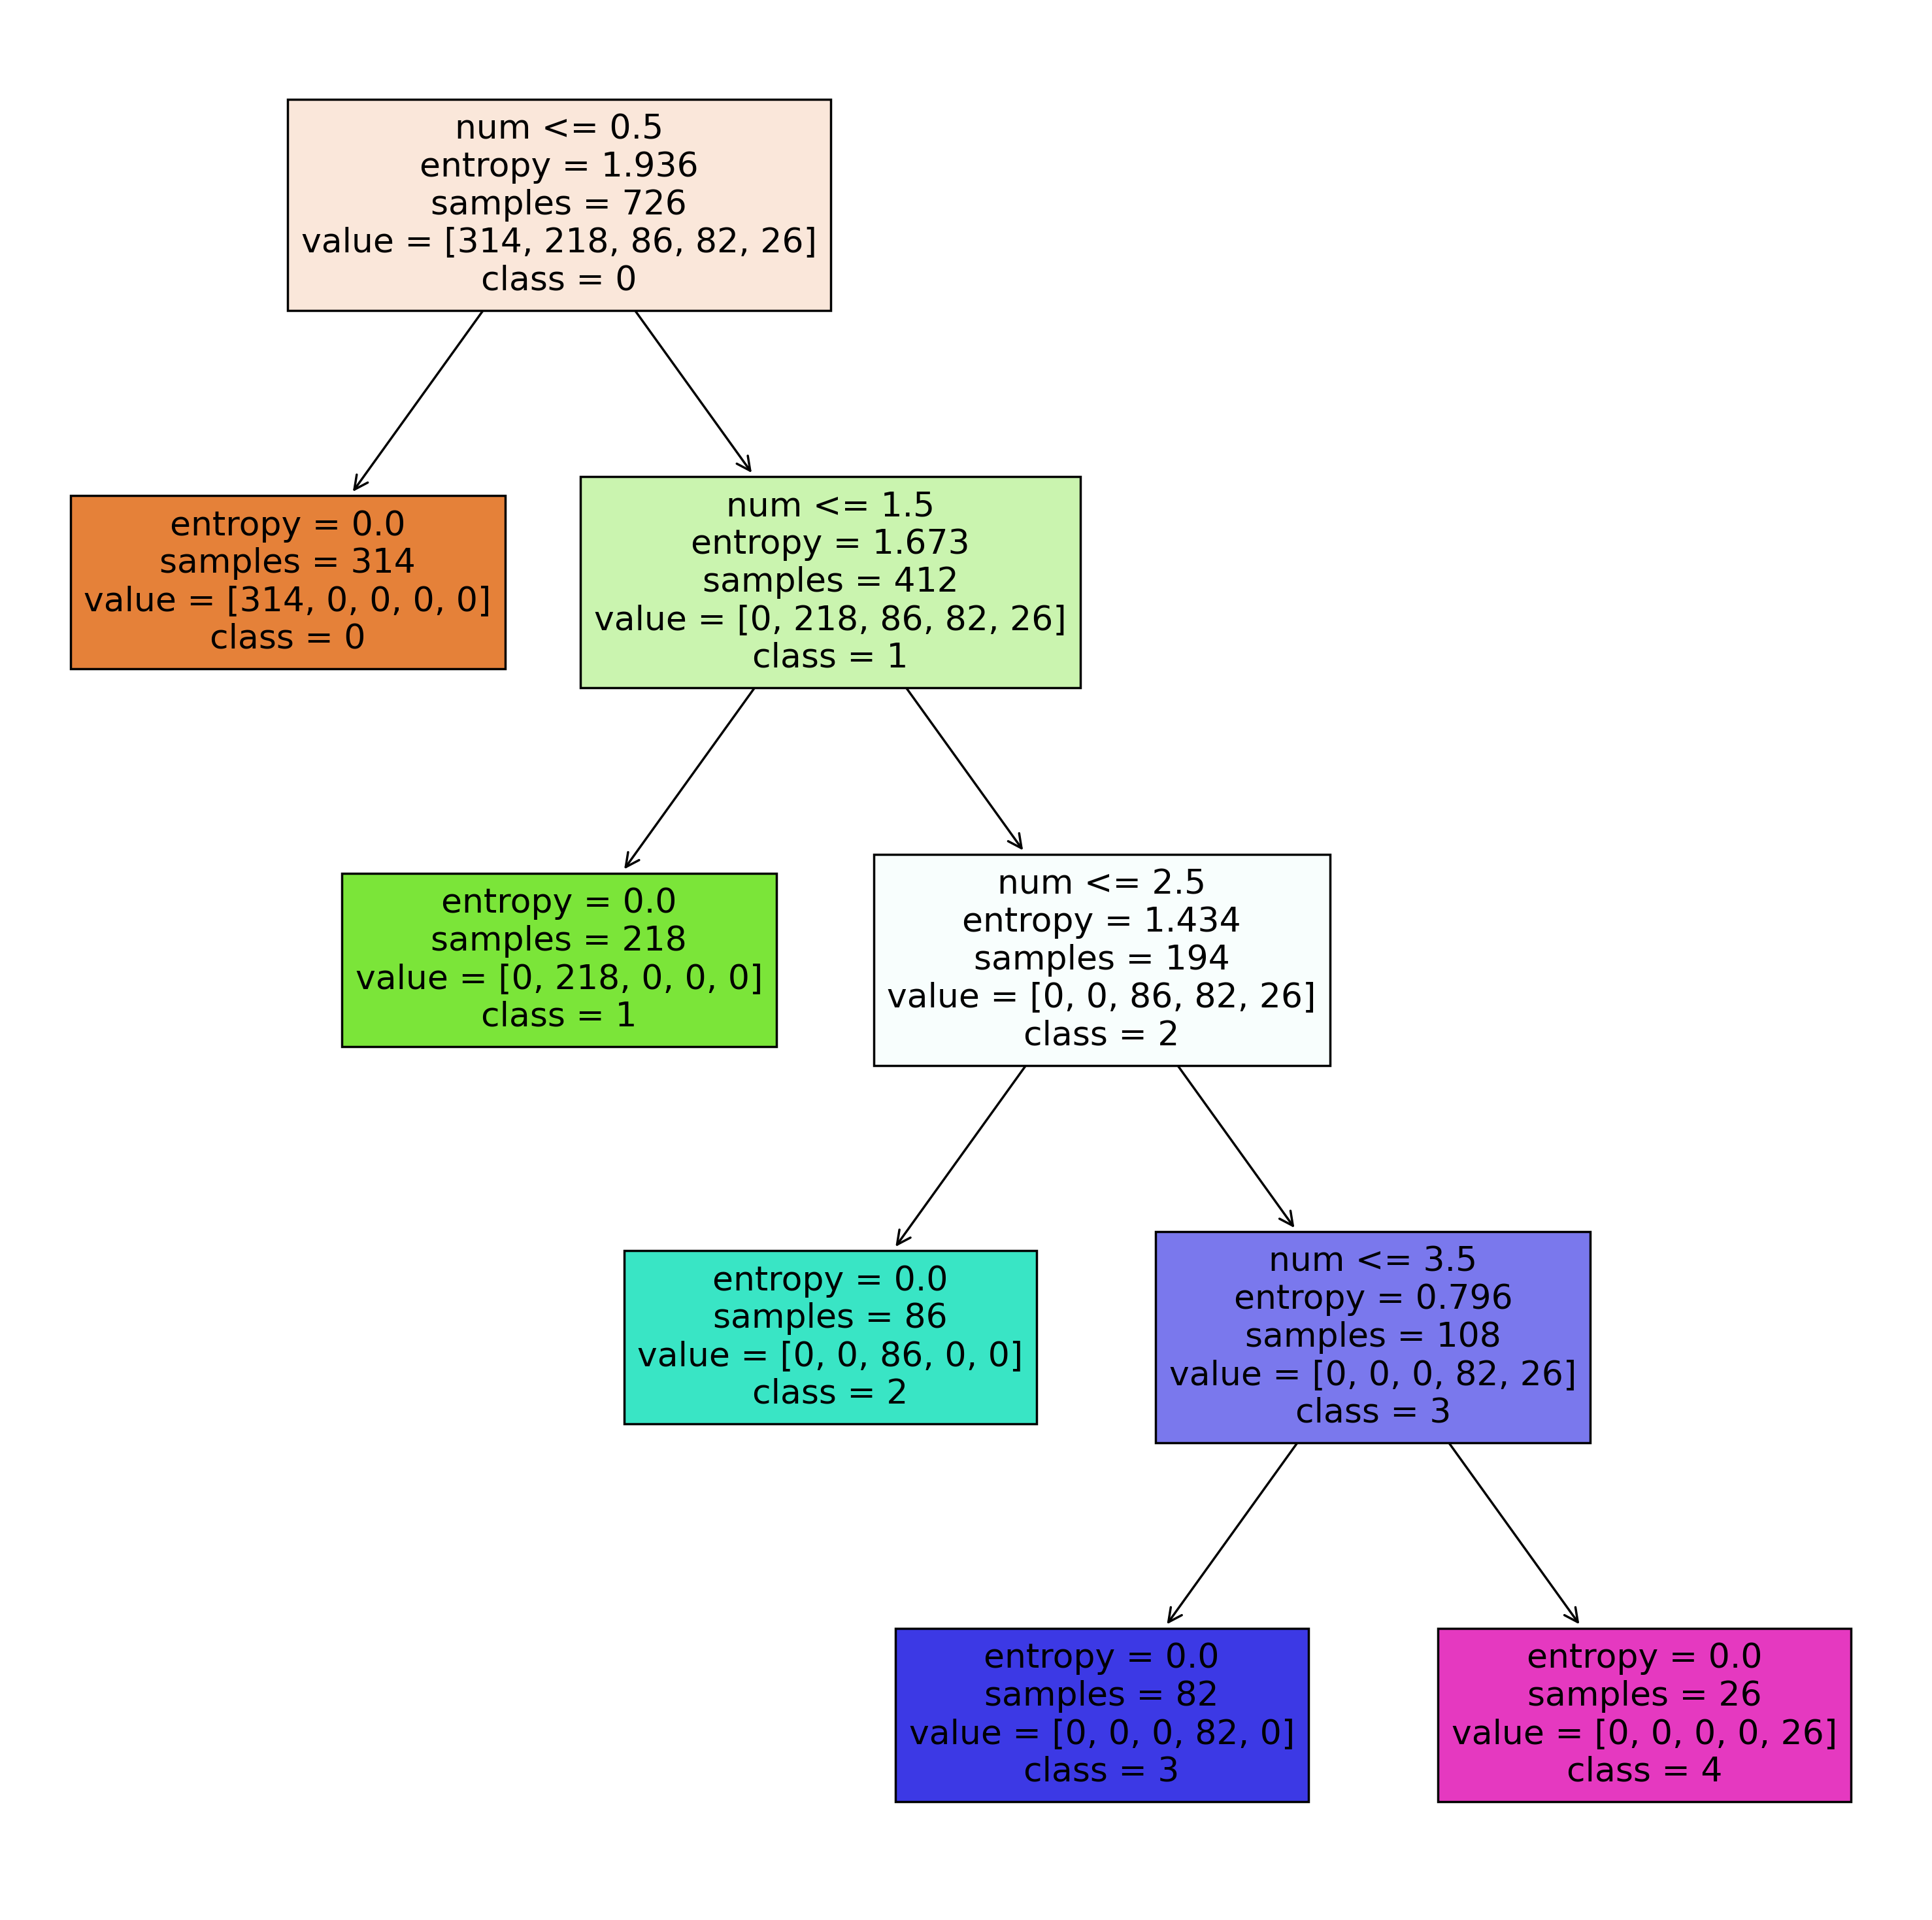

In [26]:
tree.plot_tree(dt, feature_names= ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num',
       'sex_Female', 'sex_Male', 'cp_asymptomatic', 'cp_atypical angina',
       'cp_non-anginal', 'cp_typical angina', 'restecg_lv hypertrophy',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_False',
       'exang_True', 'exang_FALSE', 'exang_TURE', 'slope_downsloping',
       'slope_flat', 'slope_upsloping', 'thal_fixed defect', 'thal_normal'],
              class_names=['0','1','2','3','4'],
              filled=True)
plt.show()

In [27]:
dt.feature_importances_   #information gain of all columns

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
x.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num',
       'sex_Female', 'sex_Male', 'cp_asymptomatic', 'cp_atypical angina',
       'cp_non-anginal', 'cp_typical angina', 'restecg_lv hypertrophy',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_False',
       'exang_True', 'exang_FALSE', 'exang_TURE', 'slope_downsloping',
       'slope_flat', 'slope_upsloping', 'thal_fixed defect', 'thal_normal'],
      dtype='object')

## CART 
classification

In [29]:
dtc=DecisionTreeClassifier(criterion='gini')

In [30]:
dtc.fit(xtrain,ytrain)
yred=dtc.predict(xtest)

In [31]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00         2

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



In [32]:
dtc.score(xtrain,ytrain), dtc.score(xtest,ytest)

(1.0, 1.0)

## Hyperparameter tunning

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
params={
    'criterion' : ['squared_error','absolute_error'],
    'max_depth' : [3,5,7,9,11],
    'splitter' : ['best','random']
}

In [37]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params,
                   verbose=1)

In [38]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'splitter': ['best', 'random']},
             verbose=1)

In [39]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 3, 'splitter': 'best'}

In [40]:
dtr = DecisionTreeRegressor(criterion='squared_error',max_depth=3,splitter='best')

In [41]:
dtr.fit(xtrain,ytrain)
ypred  = dtr.predict(xtest)

In [42]:
dtr.score(xtrain,ytrain),dtr.score(xtest,ytest)

(1.0, 1.0)

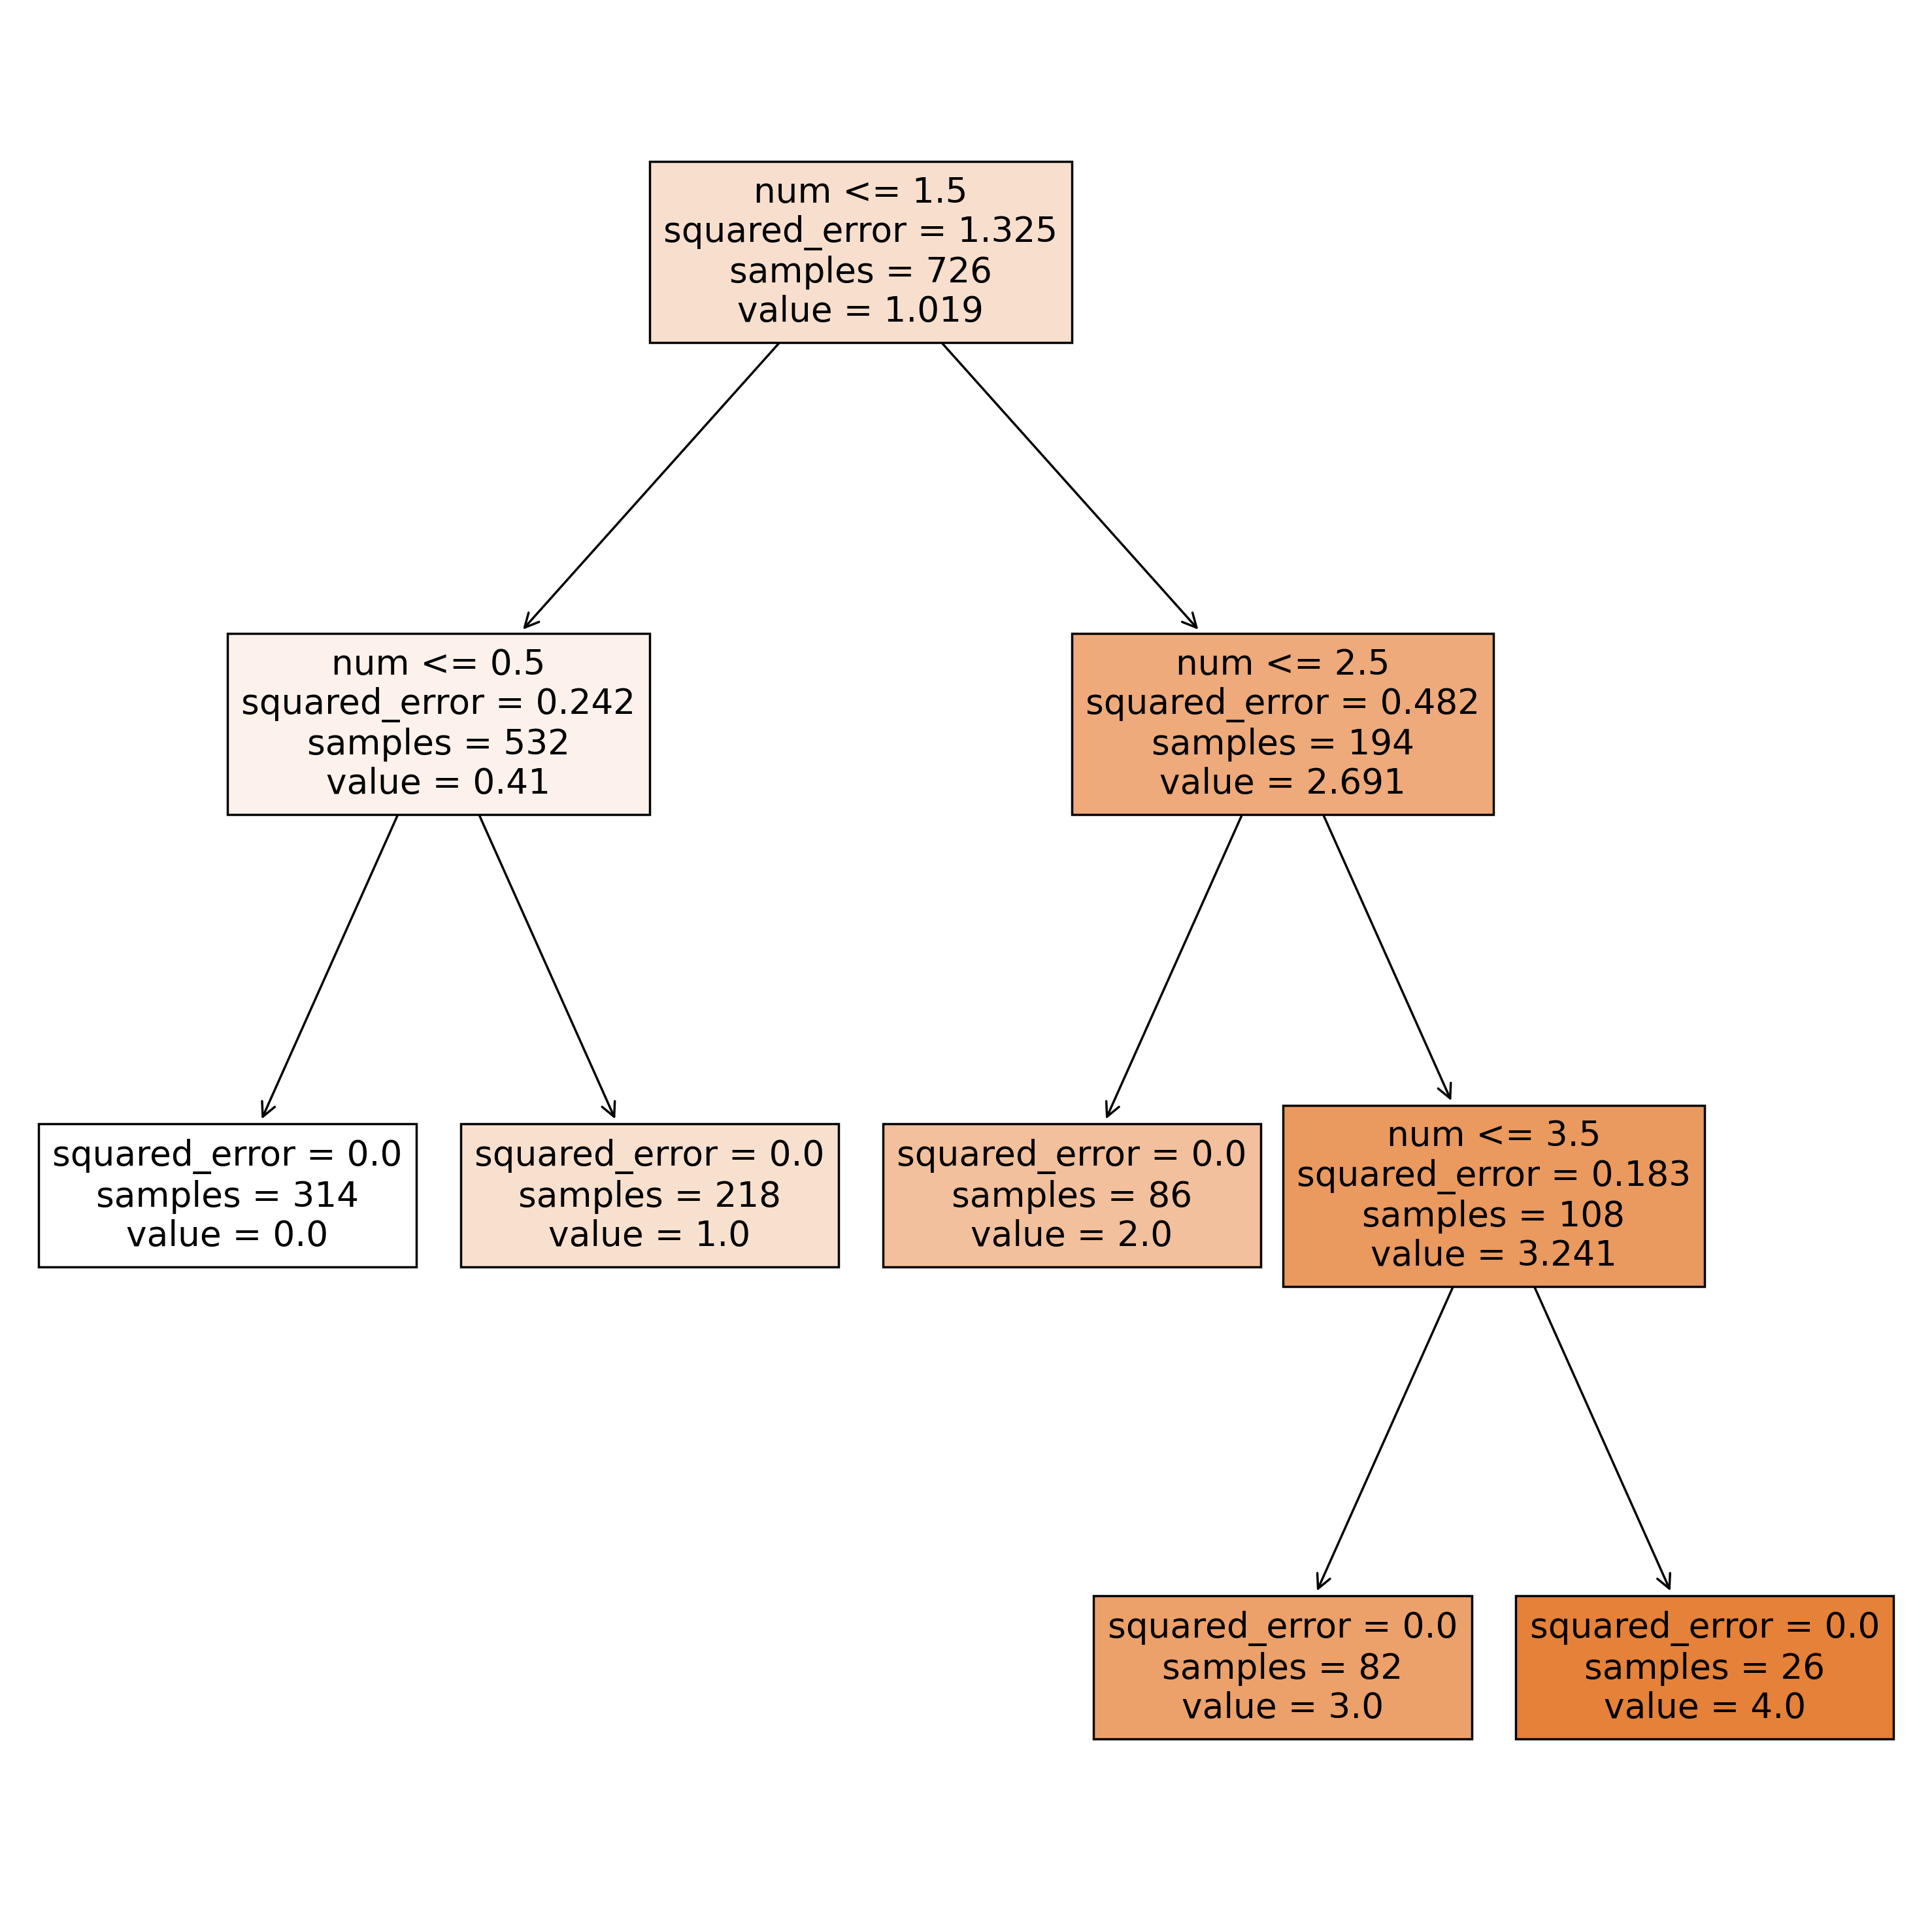

In [43]:
tree.plot_tree(dtr, feature_names=['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num',
       'sex_Female', 'sex_Male', 'cp_asymptomatic', 'cp_atypical angina',
       'cp_non-anginal', 'cp_typical angina', 'restecg_lv hypertrophy',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_False',
       'exang_True', 'exang_FALSE', 'exang_TURE', 'slope_downsloping',
       'slope_flat', 'slope_upsloping', 'thal_fixed defect', 'thal_normal'],filled=True)
plt.show()